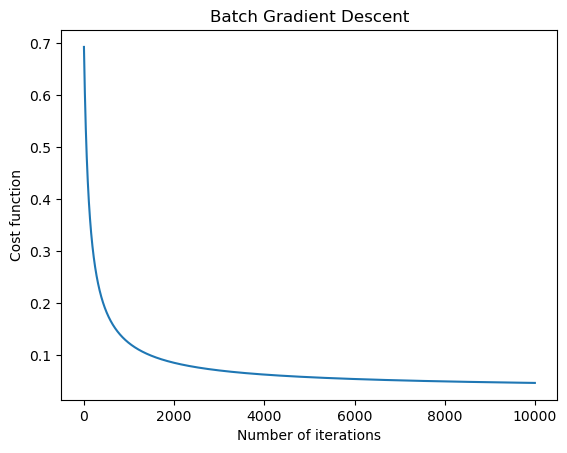

In [1]:
# Gradient Desc Question 3.2

import scipy
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from save_csv import results_to_csv

!pip install --upgrade scipy

#loading the data
training=scipy.io.loadmat('data.mat')

#checking the data
training

training_wines = training['X']
training_wine_labels = training['y']
test_wines = training['X_test']

training_wines = (training_wines - np.mean(training_wines, axis=0)) / np.std(training_wines, axis=0)
training_wines = np.hstack((training_wines, np.ones((training_wines.shape[0], 1))))



def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_regression(X, y, alpha=0.1, lam=0.1, num_iters=1000):

    theta = np.zeros(X.shape[1])
    
    
    J_history = np.zeros(num_iters)
    grad_history = np.zeros((num_iters, theta.shape[0]))
    
   
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        J = (-1/X.shape[0]) * (np.dot(y.ravel(), np.log(h)) + np.dot((1-y.ravel()), np.log(1-h))) + (lam/(2*X.shape[0])) * np.sum(theta[1:]**2)
        J_history[i] = J
        grad = (1/X.shape[0]) * np.dot(X.T, (h-y.ravel())) + (lam/X.shape[0]) * np.hstack((np.zeros(1), theta[1:]))
        grad_history[i] = grad
        
       
        theta = theta - alpha * grad
        
    return theta, J_history, grad_history



np.random.seed(42)
theta, J_history, grad_history = logistic_regression(training_wines, training_wine_labels, alpha=0.01, lam=0.1, num_iters=10000)


import matplotlib.pyplot as plt
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Batch Gradient Descent')
plt.show()


In [2]:
theta

array([ 0.96354386,  1.15851183, -0.30616021, -0.83206574,  0.80360615,
       -0.08538351, -1.7787202 ,  1.24190886,  0.68533728,  0.76771732,
        0.19451775,  0.19579013, -2.66435218])

In [3]:
test_wines = (test_wines - np.mean(test_wines, axis=0)) / np.std(test_wines, axis=0)


In [4]:
test_wines = np.hstack((test_wines, np.ones((test_wines.shape[0], 1))))

In [5]:
y_pred = sigmoid(np.dot(test_wines,theta))
y_pred_final = (y_pred >0.5).astype(np.int32)

In [6]:
y_pred = y_pred.reshape(-1,)
results_to_csv(y_pred)